# Table of Contents
## 1.0 Setup
## 2.0 Data Cleaning and Wrangling
    2.1 Data frame fbs
    2.2 Data frame fbs_hist
    2.3 Joining the data frames, creating the 6-variable data frame
    2.4 Creating the IDR and SSR variables
## 3.0 Data preparation for regression analysis
    3.1 All data
    3.2 The data without extreme values
## 4.0 Regression analysis
    4.2 All data
    4.3 The data without extreme values
## 5.0 Exporting Data

## 1.0 Setup

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Defining the path

path = (r'E:\OneDrive\ANITA\DATA ANALYST\IMMERSION\Achievement 6\11-22 Food Balance Sheet Analysis\2.0 Data')

In [3]:
# Importing fbs_6_variables.pkl as fbs

fbs = pd.read_pickle(os.path.join(path, '2.2 Prepared data', 'fbs_6_variables.pkl'))

In [4]:
# Importing fbs_hist.pkl fbs_hist

fbs_hist = pd.read_pickle(os.path.join(path, '2.1 Original data', 'fbs_hist.pkl'))

In [5]:
# Setting up graph display options

%matplotlib inline

In [6]:
# Setting up display options

pd.set_option('display.max_rows', None)

## 2.0 Data Cleaning and Wrangling

### 2.1 Data frame fbs 

In [7]:
# Replacing 'Total Population - Both sexes' with 'Total Population'

fbs.replace('Total Population - Both sexes', 'Total Population', inplace = True)

In [8]:
# Replacing 'Domestic supply quantity' with 'Domestic Supply Quantity'

fbs.replace('Domestic supply quantity', 'Domestic Supply Quantity', inplace = True)

In [9]:
fbs.head()

,Country,Element Code,Element,Item,Year,Unit,Value
0,Afghanistan,511,Total Population,Population,2010,1000 persons,29186.0
1,Afghanistan,511,Total Population,Population,2011,1000 persons,30117.0
2,Afghanistan,511,Total Population,Population,2012,1000 persons,31161.0
3,Afghanistan,511,Total Population,Population,2013,1000 persons,32270.0
4,Afghanistan,511,Total Population,Population,2014,1000 persons,33371.0


In [10]:
fbs.shape

(883800, 7)

### 2.2 Data frame fbs_hist

The orignal data set contains the data for ten years which means that the data set for the regression model could have a maximum of 1810 data points if only the original data set is used.

To increase the number of data points for ML, additional historical data will be added.

In [11]:
fbs_hist.head()

,Area,Element Code,Element,Item,Year,Unit,Value
0,Afghanistan,511,Total Population - Both sexes,Population,1961,1000 persons,8954.0
1,Afghanistan,511,Total Population - Both sexes,Population,1962,1000 persons,9142.0
2,Afghanistan,511,Total Population - Both sexes,Population,1963,1000 persons,9340.0
3,Afghanistan,511,Total Population - Both sexes,Population,1964,1000 persons,9547.0
4,Afghanistan,511,Total Population - Both sexes,Population,1965,1000 persons,9765.0


In [12]:
fbs_hist.dtypes

Area             object
Element Code      int64
Element          object
Item             object
Year              int64
Unit             object
Value           float64
dtype: object

In [13]:
# Checking for mixed types

for col in fbs_hist.columns.tolist():
    weird = (fbs_hist[[col]].applymap(type) != fbs_hist[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (fbs_hist[weird]) > 0:
        print (col)
        
# No mixed types were found

Unit


In [14]:
# Creating a subset with the duplicated values from the fbs

fbs_hist_duplicates = fbs_hist[fbs_hist.duplicated()]

In [15]:
fbs_hist_duplicates.shape

# No duplicates were found

(0, 7)

In [16]:
# Changing the data type of the column "Element Code"

fbs_hist['Element Code'] = fbs_hist['Element Code'].astype('str')

In [17]:
fbs_hist.shape

(14131159, 7)

In [18]:
# Renaming column 'Area' into 'Country'

fbs_hist.rename(columns = {'Area' : 'Country'}, inplace = True)

In [19]:
fbs_hist.head()

,Country,Element Code,Element,Item,Year,Unit,Value
0,Afghanistan,511,Total Population - Both sexes,Population,1961,1000 persons,8954.0
1,Afghanistan,511,Total Population - Both sexes,Population,1962,1000 persons,9142.0
2,Afghanistan,511,Total Population - Both sexes,Population,1963,1000 persons,9340.0
3,Afghanistan,511,Total Population - Both sexes,Population,1964,1000 persons,9547.0
4,Afghanistan,511,Total Population - Both sexes,Population,1965,1000 persons,9765.0


In [20]:
fbs_hist.isnull().sum()

Country               0
Element Code          0
Element               0
Item                  0
Year                  0
Unit            8027047
Value           8027047
dtype: int64

### 2.3 Joining the data frames, creating the 6-variable data frame

In [21]:
# Creating the list of data frames

frames = [fbs, fbs_hist]

In [22]:
fbs1 = pd.concat(frames)

In [23]:
fbs1.shape

(15014959, 7)

In [24]:
# Creating a data frame with needed variables

element_codes = ['511', '5511', '5611', '5911', '5301', '5142']
fbs2 = fbs1[fbs1["Element Code"].isin(element_codes)]

In [25]:
fbs_6v = pd.crosstab(index = [fbs2['Country'], fbs2['Year']], columns = fbs2['Element'], values = fbs2['Value'], aggfunc = 'sum').reset_index()

In [26]:
fbs_6v.head(100)

Element,Country,Year,Domestic Supply Quantity,Domestic supply quantity,Export Quantity,Food,Import Quantity,Production,Total Population,Total Population - Both sexes
0,Afghanistan,1961,NaN,5527.30,111.00,4381.30,86.00,5557.30,NaN,8954.0
1,Afghanistan,1962,NaN,5528.30,134.00,4347.30,54.00,5610.30,NaN,9142.0
2,Afghanistan,1963,NaN,5420.30,128.00,4229.30,113.00,5423.30,NaN,9340.0
3,Afghanistan,1964,NaN,5904.30,107.00,4715.30,171.00,5841.30,NaN,9547.0
4,Afghanistan,1965,NaN,6114.30,139.00,4876.30,195.00,6074.30,NaN,9765.0
5,Afghanistan,1966,NaN,5915.30,213.00,4722.30,260.00,5921.30,NaN,9990.0
6,Afghanistan,1967,NaN,6531.40,228.00,5250.40,257.00,6511.40,NaN,10222.0
7,Afghanistan,1968,NaN,6611.40,231.00,5341.40,109.00,6685.40,NaN,10466.0
8,Afghanistan,1969,NaN,6802.46,232.00,5488.46,177.00,6852.46,NaN,10729.0
9,Afghanistan,1970,NaN,6119.46,226.00,4888.46,213.00,6127.46,NaN,11016.0


In [27]:
fbs_6v.isnull().sum()

Element
Country                             0
Year                                0
Domestic Supply Quantity         8477
Domestic supply quantity         1800
Export Quantity                     0
Food                                0
Import Quantity                     0
Production                          0
Total Population                 8477
Total Population - Both sexes    1800
dtype: int64

In [28]:
fbs_6v.shape

(10277, 10)

Columns 'Domestic Supply Quantity' and 'Domestic supply quantity' and 'Total Population' and 'Total Population - Both sexes' are in fact the same variable, only for different time series, so they will be joined into a single column.

In [29]:
# Replacing all NaN values with 0

fbs_6v = fbs_6v.replace(np.nan, 0)

In [30]:
# Merging columns 'Domestic Supply Quantity' and 'Domestic supply quantity

fbs_6v['Domestic Supply Quantity1'] = fbs_6v['Domestic Supply Quantity'] + fbs_6v['Domestic supply quantity'] 

In [31]:
# Merging columns 'Total Population' and 'Total Population - Both sexes' 

fbs_6v['Total Population1'] = fbs_6v['Total Population'] + fbs_6v['Total Population - Both sexes']

In [32]:
# Dropping unnecessary columns

fbs_6v.drop(['Domestic Supply Quantity', 'Domestic supply quantity', 'Total Population', 'Total Population - Both sexes'], axis = 1, inplace = True)

In [33]:
# Renaming Domestic Supply Quantity1 column

fbs_6v.rename(columns = {'Domestic Supply Quantity1' : 'Domestic Supply Quantity'}, inplace = True)

In [34]:
# Renaming Total Population1 column

fbs_6v.rename(columns = {'Total Population1' : 'Total Population'}, inplace = True)

In [35]:
fbs_6v.isnull().sum()

Element
Country                     0
Year                        0
Export Quantity             0
Food                        0
Import Quantity             0
Production                  0
Domestic Supply Quantity    0
Total Population            0
dtype: int64

In [36]:
fbs_6v.shape

(10277, 8)

In [37]:
fbs_6v.head()

Element,Country,Year,Export Quantity,Food,Import Quantity,Production,Domestic Supply Quantity,Total Population
0,Afghanistan,1961,111.0,4381.3,86.0,5557.3,5527.3,8954.0
1,Afghanistan,1962,134.0,4347.3,54.0,5610.3,5528.3,9142.0
2,Afghanistan,1963,128.0,4229.3,113.0,5423.3,5420.3,9340.0
3,Afghanistan,1964,107.0,4715.3,171.0,5841.3,5904.3,9547.0
4,Afghanistan,1965,139.0,4876.3,195.0,6074.3,6114.3,9765.0


### 2.4 Creating the IDR and SSR variables

In [38]:
# Creating Import Dependency Ratio variable

fbs_6v['Import Dependency Ratio'] = (fbs_6v['Import Quantity'] * 100) / (fbs_6v['Production'] + fbs_6v['Import Quantity'] - fbs_6v['Export Quantity'])

In [39]:
# Creating Self-sufficiency Ratio variable

fbs_6v['Self-sufficiency Ratio'] = (fbs_6v['Production'] * 100) / (fbs_6v['Production'] + fbs_6v['Import Quantity'] - fbs_6v['Export Quantity'])

In [40]:
fbs_6v.head()

Element,Country,Year,Export Quantity,Food,Import Quantity,Production,Domestic Supply Quantity,Total Population,Import Dependency Ratio,Self-sufficiency Ratio
0,Afghanistan,1961,111.0,4381.3,86.0,5557.3,5527.3,8954.0,1.554507,100.451892
1,Afghanistan,1962,134.0,4347.3,54.0,5610.3,5528.3,9142.0,0.976439,101.446576
2,Afghanistan,1963,128.0,4229.3,113.0,5423.3,5420.3,9340.0,2.089381,100.277351
3,Afghanistan,1964,107.0,4715.3,171.0,5841.3,5904.3,9547.0,2.895704,98.916228
4,Afghanistan,1965,139.0,4876.3,195.0,6074.3,6114.3,9765.0,3.180921,99.086505


In [41]:
fbs_6v.shape

(10277, 10)

In [42]:
fbs_6v.isnull().sum()

Element
Country                       0
Year                          0
Export Quantity               0
Food                          0
Import Quantity               0
Production                    0
Domestic Supply Quantity      0
Total Population              0
Import Dependency Ratio     993
Self-sufficiency Ratio      993
dtype: int64

In [43]:
nulls = fbs_6v[fbs_6v.isna().any(axis = 1)]

In [44]:
nulls

Element,Country,Year,Export Quantity,Food,Import Quantity,Production,Domestic Supply Quantity,Total Population,Import Dependency Ratio,Self-sufficiency Ratio
354,Armenia,1961,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
355,Armenia,1962,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
356,Armenia,1963,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
357,Armenia,1964,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
358,Armenia,1965,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
359,Armenia,1966,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
360,Armenia,1967,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
361,Armenia,1968,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
362,Armenia,1969,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
363,Armenia,1970,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


Since all NaN values are for rows with all zero values, they will be dropped from the data frame since NaN values are rejected by the regression model.

In [45]:
fbs_6v = fbs_6v.dropna()

In [46]:
fbs_6v.shape

(9284, 10)

## 3.0 Data preparation for regression analysis

After the geospatial analysis, one of the hypothesis that required further examination was the negative correlation between the Import Dependency Ratio and Self-sufficiency Ratio, so these two variables were chosen for the first regression model.

### 3.1 All data

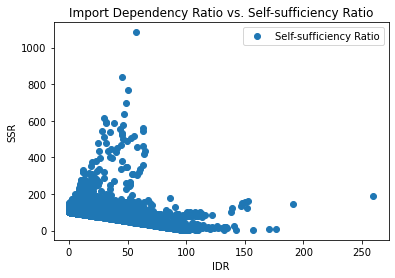

In [47]:
# Creating a scatterplot for IDR and SSR

fbs_6v.plot(x = 'Import Dependency Ratio', y = 'Self-sufficiency Ratio', style = 'o')

plt.title('Import Dependency Ratio vs. Self-sufficiency Ratio')  
plt.xlabel('IDR')  
plt.ylabel('SSR')  
plt.show()

In [48]:
# Reshaping the variables into NumPy arrays and putting them into separate objects

X = fbs_6v['Import Dependency Ratio'].values.reshape(-1,1)
y = fbs_6v['Self-sufficiency Ratio'].values.reshape(-1,1)

In [49]:
X

array([[ 1.55450717],
       [ 0.97643889],
       [ 2.08938114],
       ...,
       [11.58485345],
       [ 8.7625265 ],
       [ 6.24080135]])

In [50]:
y

array([[100.45189162],
       [101.44657614],
       [100.27735148],
       ...,
       [ 90.80281728],
       [ 93.54602612],
       [ 97.44007877]])

In [51]:
# Splitting the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 3.2 The data without extreme values

In [52]:
# Cleaning the extreme values from the 'Self-sufficiency Ratio' variable

fbs_6v_sub = fbs_6v[fbs_6v['Self-sufficiency Ratio'] <=250] 

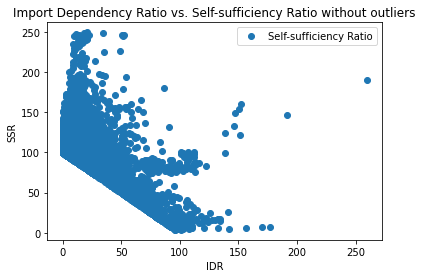

In [53]:
# Creating a scatterplot for IDR and SSR without outliers

fbs_6v_sub.plot(x = 'Import Dependency Ratio', y = 'Self-sufficiency Ratio', style = 'o')

plt.title('Import Dependency Ratio vs. Self-sufficiency Ratio without outliers')  
plt.xlabel('IDR')  
plt.ylabel('SSR')  
plt.show()

In [54]:
# Reshaping the variables into NumPy arrays and putting them into separate objects

X_sub = fbs_6v_sub['Import Dependency Ratio'].values.reshape(-1,1)
y_sub = fbs_6v_sub['Self-sufficiency Ratio'].values.reshape(-1,1)

In [55]:
X_sub

array([[ 1.55450717],
       [ 0.97643889],
       [ 2.08938114],
       ...,
       [11.58485345],
       [ 8.7625265 ],
       [ 6.24080135]])

In [56]:
y_sub

array([[100.45189162],
       [101.44657614],
       [100.27735148],
       ...,
       [ 90.80281728],
       [ 93.54602612],
       [ 97.44007877]])

In [57]:
# Splitting the data into a training set and a test set

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size = 0.3, random_state = 0)

## 4.0 Regression analysis

### 4.1 All data

In [58]:
# Creating a regression object

IDR_SSR_regression = LinearRegression()

In [59]:
# Fitting the regression object onto the training set

IDR_SSR_regression.fit(X_train, y_train)

LinearRegression()

In [61]:
# Predicting the values of y using X.

y_predicted = IDR_SSR_regression.predict(X_test)

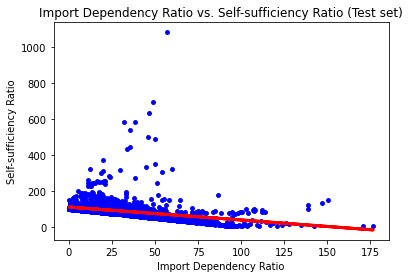

In [62]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'blue', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Import Dependency Ratio vs. Self-sufficiency Ratio (Test set)')
plot_test.xlabel('Import Dependency Ratio')
plot_test.ylabel('Self-sufficiency Ratio')
plot_test.show()

In [63]:
# Creating objects that contain the model summary statistics

IDR_SSR_RMSE = mean_squared_error(y_test, y_predicted)
IDR_SSR_R2 = r2_score(y_test, y_predicted)

In [64]:
# Printing the model summary statistics

print('Slope: ', IDR_SSR_regression.coef_)
print('Mean squared error: ', IDR_SSR_RMSE)
print('R2 score: ', IDR_SSR_R2)

Slope:  [[-0.71945618]]
Mean squared error:  1839.204247683266
R2 score:  0.1431415789714291


As expected, there is a negative correalation between the Import Dependency and Self-sufficiency Ratios, but given the MSE and R2 scores, the regression model is not an appropriate model for this combination of variables.

### 4.2 The data without extreme values

In [65]:
# Creating a regression object

IDR_SSR_regression_sub = LinearRegression()

In [66]:
# Fitting the regression object onto the training set

IDR_SSR_regression_sub.fit(X_train_sub, y_train_sub)

LinearRegression()

In [67]:
# Predicting the values of y using X.

y_predicted_sub = IDR_SSR_regression_sub.predict(X_test_sub)

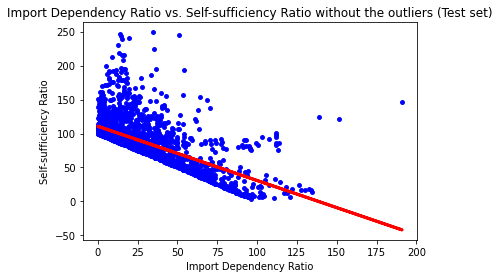

In [68]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test_sub, y_test_sub, color = 'blue', s = 15)
plot_test.plot(X_test_sub, y_predicted_sub, color = 'red', linewidth = 3)
plot_test.title('Import Dependency Ratio vs. Self-sufficiency Ratio without the outliers (Test set)')
plot_test.xlabel('Import Dependency Ratio')
plot_test.ylabel('Self-sufficiency Ratio')
plot_test.show()

In [69]:
# Creating objects that contain the model summary statistics

IDR_SSR_RMSE_sub = mean_squared_error(y_test_sub, y_predicted_sub)
IDR_SSR_R2_sub = r2_score(y_test_sub, y_predicted_sub)

In [70]:
# Printing the model summary statistics

print('Slope: ', IDR_SSR_regression_sub.coef_)
print('Mean squared error: ', IDR_SSR_RMSE_sub)
print('R2 score: ', IDR_SSR_R2_sub)

Slope:  [[-0.79932533]]
Mean squared error:  513.5194881937144
R2 score:  0.43783809446464395


Even thought both MSE and R2 performed substantially better compared to the results of the entire data set, the results show that the regression model is still not an appropriate model for this combination of variables.

However, there are some differences in the methodology of collecing the data before and after 2010, so it is possible the results of the regression model would be different if the data was collected in the same way (even though the FAO states that those differences should allow comparisons between the data).

## 5.0 Exporting data

In [71]:
# Exporting fbs_6v as pickle

fbs_6v.to_pickle(os.path.join(path, '2.2 Prepared data', 'fbs_hist.pkl'))

In [73]:
# Exporting fbs_6v as csv

fbs_6v.to_csv(os.path.join(path, '2.2 Prepared data', 'fbs_hist.csv'))

In [72]:
# Exporting fbs as pickle

fbs.to_pickle(os.path.join(path, '2.2 Prepared data', 'fbs_6v.pkl'))

In [74]:
# Exporting fbs as csv

fbs.to_csv(os.path.join(path, '2.2 Prepared data', 'fbs_6v.csv'))